<a href="https://colab.research.google.com/github/prajwalmadankar0/Heart-Diseases-Prediction/blob/main/Heart_disease_prediction_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv
/kaggle/input/heart-disease-dataset/heart.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.cm import rainbow
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class textColor:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# **Metadata**
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# **Data Overview**

In [ ]:
heartData=pd.read_csv('../input/heart-disease-dataset/heart.csv')
# heartData=pd.read_csv('/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv')
heartData.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
836,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
210,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
360,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
231,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [ ]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
import scipy.stats as stats
import pylab

color='#e1679c'

def colDistri(data,var):
    print('\n'+textColor.BOLD+textColor.UNDERLINE+ 'Skewness : '+str(data[var].skew(axis = 0, skipna = True))+'\n')
    fig=plt.figure(figsize=(12,9))

    fig.suptitle('\"'+var+'\" '+'Column Distribution', fontweight='bold', fontsize=16)


    ax_1=fig.add_subplot(1, 2, 1)
    plt.title('Box Plot', fontweight='bold', fontsize=14)
    sns.boxplot(data=data, y=var, boxprops=dict(alpha=0.8), linewidth=2,color=color)
    plt.ylabel(var, fontsize=11)

    ax_2=fig.add_subplot(2, 2, 2)
    plt.title('Histogram Plot', fontweight='bold', fontsize=14)
    sns.histplot(data=data, x=var, kde=True,color=color)
    plt.xlabel(var, fontsize=11)
    plt.ylabel('Count', fontsize=11)

    ax_3=fig.add_subplot(2, 2, 4)
    plt.title('Q-Q Plot', fontweight='bold', fontsize=14)
    stats.probplot(data[var], dist="norm", plot=pylab)
    ax_3.get_lines()[0].set_markerfacecolor(color)
    plt.xlabel('Theoritical Quantiles', fontsize=11)
    plt.ylabel('Sample Quantiles', fontsize=11)
    plt.show()
    print()


Skewness : -0.24886590174584555



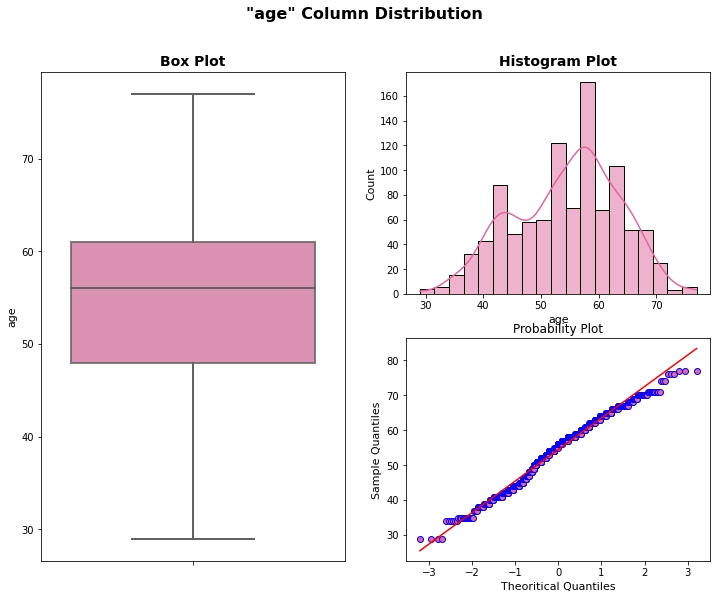

In [ ]:
colDistri(heartData,'age')


Skewness : 0.739768226050074



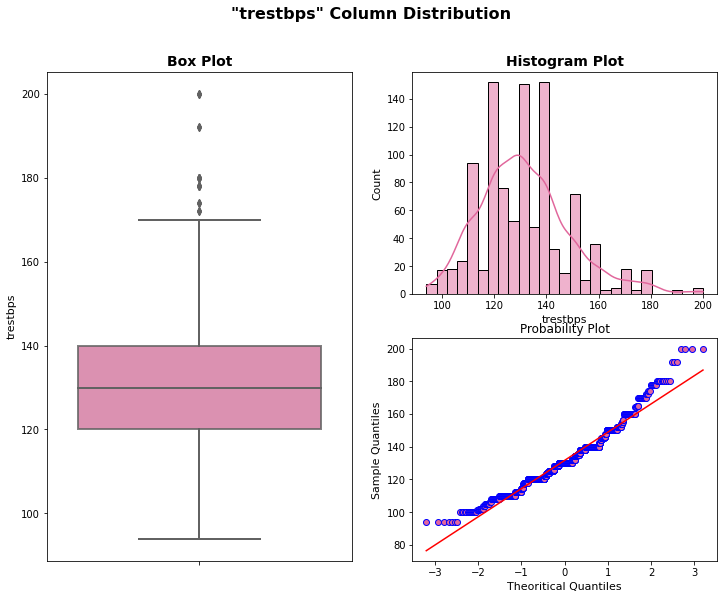

In [ ]:
colDistri(heartData,'trestbps')


Skewness : -0.5137771771417209



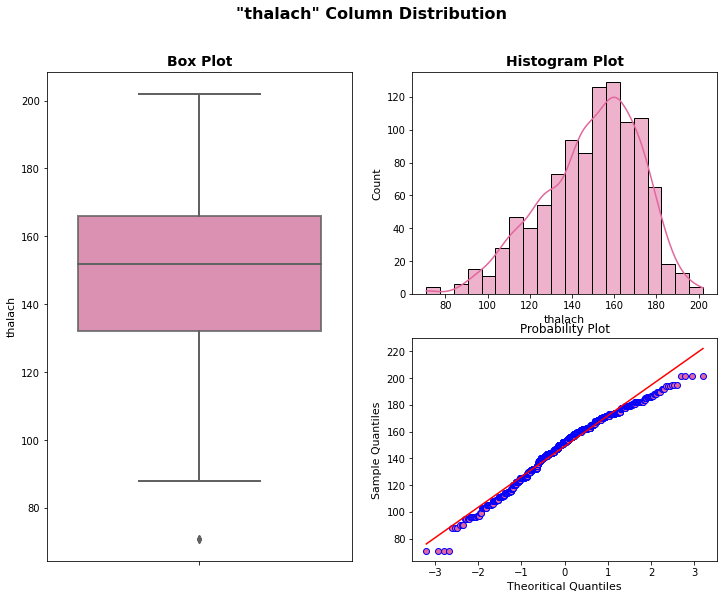

In [ ]:
colDistri(heartData,'thalach')


Skewness : 1.2108993882065326



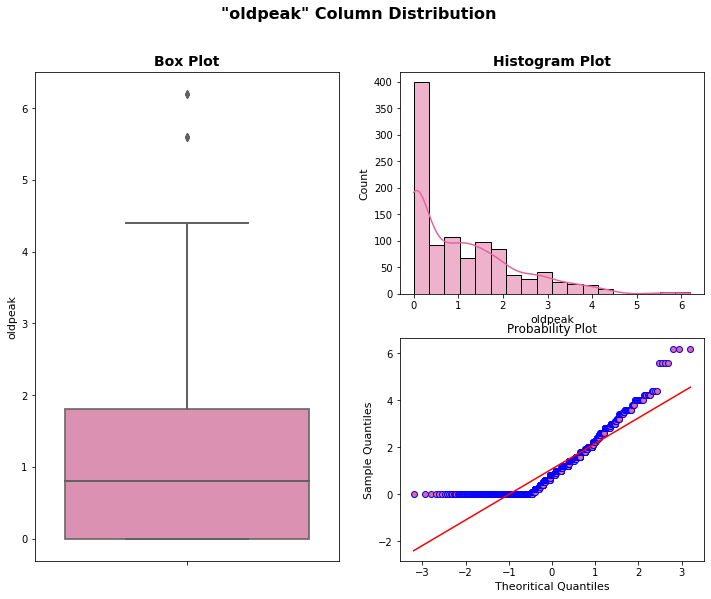

In [ ]:
colDistri(heartData,'oldpeak')


Skewness : 1.0740727783354815



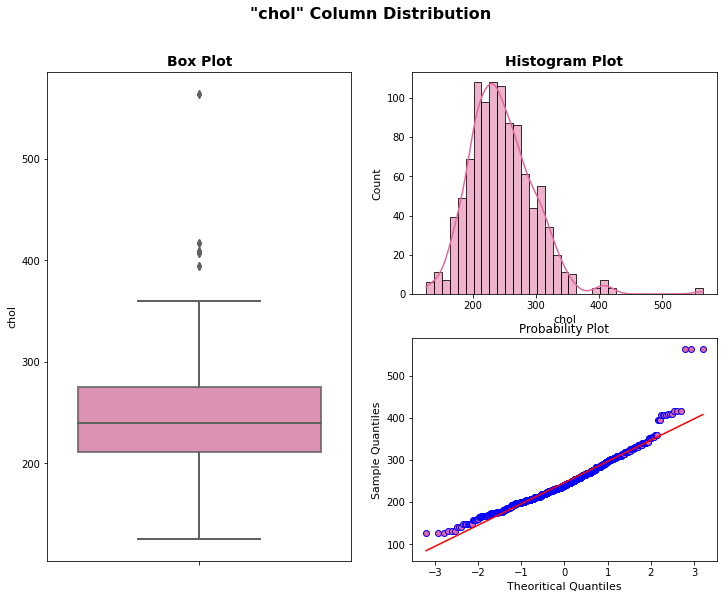

In [ ]:
colDistri(heartData,'chol')

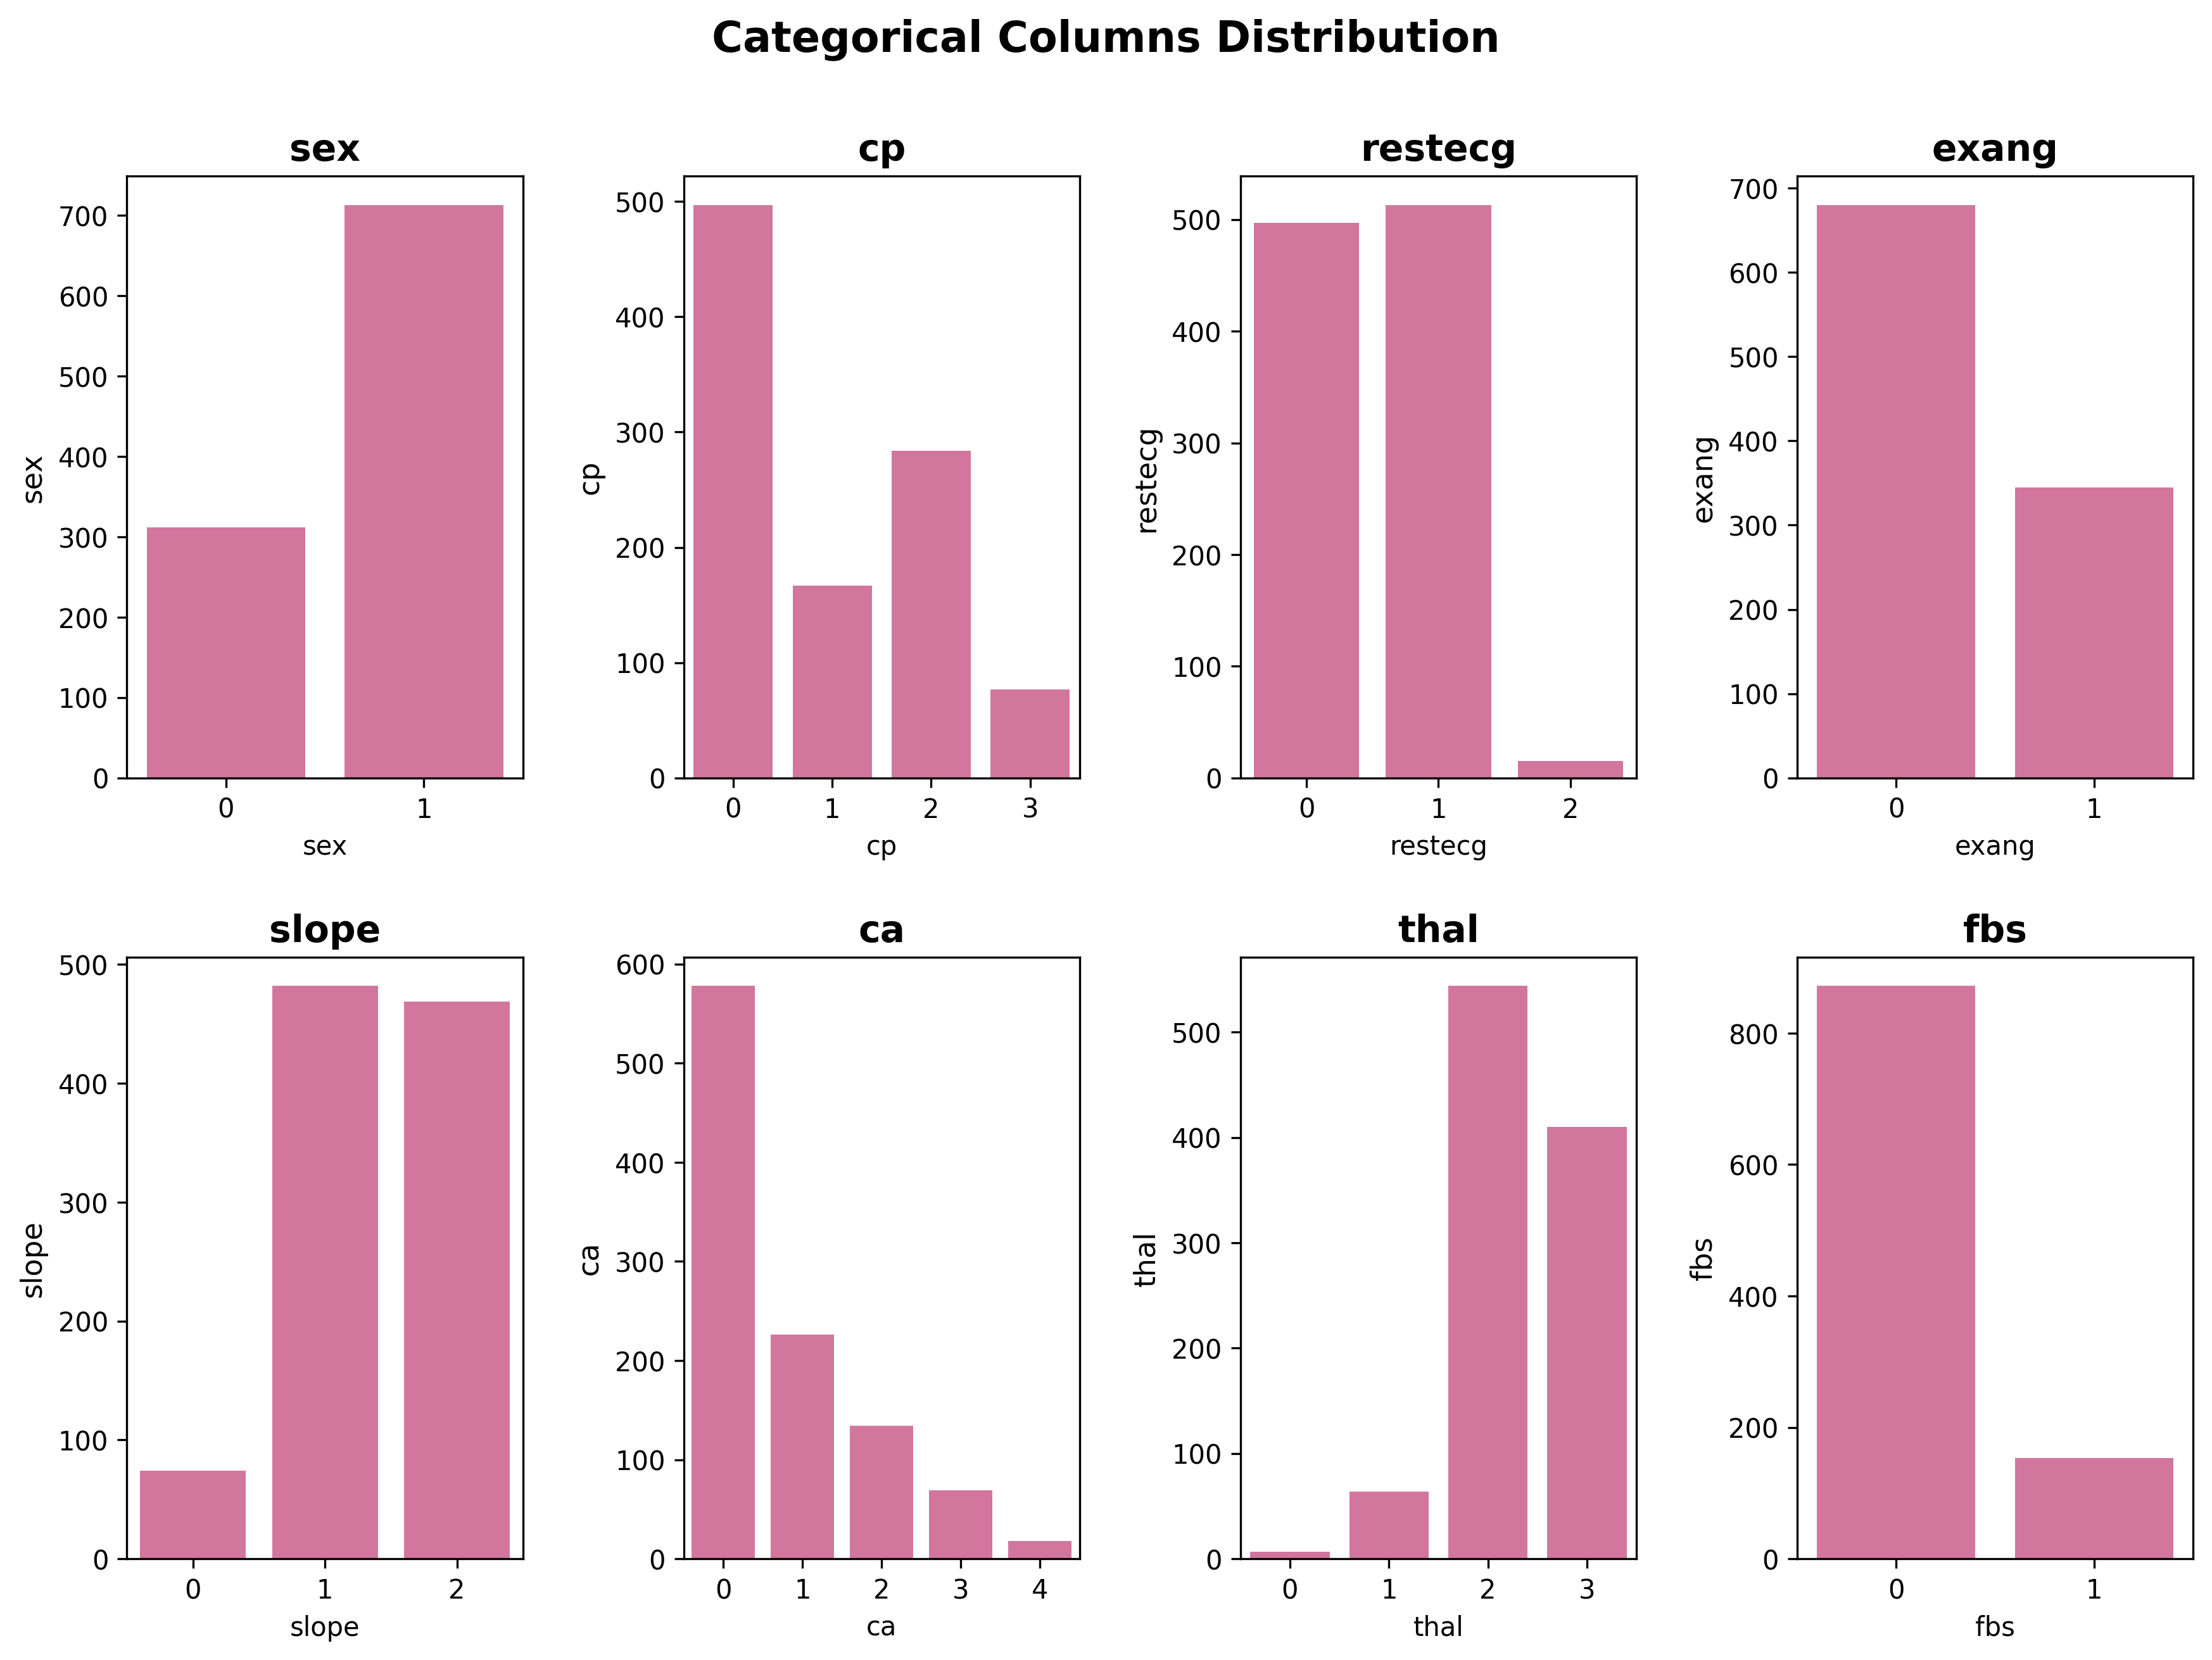

In [ ]:
cols=['sex','cp','restecg','exang','slope','ca','thal','fbs']

fig=plt.figure(figsize=(12,9),dpi=300)

fig.suptitle('Categorical Columns Distribution', fontweight='bold', fontsize=16)

x=1

for i in range(len(cols)):
    fig.add_subplot(2, 4, i+1)
    plt.title(cols[i], fontweight='bold', fontsize=14)
    sns.countplot(data=heartData, x=cols[i], linewidth=2,color=color)
    plt.ylabel(cols[i], fontsize=11)

fig.tight_layout(pad=2.0)


# **Exploratory Data Analysis**

In [ ]:
df=heartData[['sex','age','target']]
df['sex'].replace({1:'Male',0:'Female'},inplace=True)
df['target'].replace({1:'Heart Patient',0:'Healthy'},inplace=True)

In [ ]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "histogram"}, {"type": "histogram"}]])
fig.add_trace(
    go.Histogram(
             x=df['age'].where(df['target']=='Heart Patient'),
             name='Heart Patient',
             nbinsx=20,
             showlegend=False,
             marker={"color": '#f84242'}
             ),
    row=1,col=1
)
fig.add_trace(
     go.Histogram(
             x=df['age'].where(df['target']=='Healthy'),
             name='Healthy',
             nbinsx=20,
             showlegend=False,
             marker={"color": 'white'}
             ),
    row=1,col=1
)
fig.add_trace(
    go.Histogram(
             x=df['sex'].where(df['target']=='Heart Patient'),
             name='Heart Patient',
             nbinsx=20,
             marker={"color": '#f84242'}
             ),
    row=1,col=2
)
fig.add_trace(
     go.Histogram(
             x=df['sex'].where(df['target']=='Healthy'),
             name='Healthy',
             nbinsx=20,
             marker={"color": 'white'}
             ),
    row=1,col=2
)

fig.update_layout(height=500,
                  title_text="<b>Age & Gender Distribution<b>",
                  title_font_size=30,
                  bargap=0.1,
                  template='plotly_dark',
                 )
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_xaxes(title_text="Gender", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.show()

* **We can see that the risk of heart disease is higher among people of ages upto 55 and is drastically low among adults above 55 years of age**
* **The risk of heart disease is seen to be more prevalent among women than men.**

In [ ]:
cp1=heartData.where(heartData['target']==0).groupby(by=["cp"]).size().reset_index(name="Count")
cp0=heartData.where(heartData['target']==1).groupby(by=["cp"]).size().reset_index(name="Count")

cp0['cp'].replace({0:'Type 1',1:'Type 2',2:'Type 3',3:'Type 4'},inplace=True)
cp1['cp'].replace({0:'Type 1',1:'Type 2',2:'Type 3',3:'Type 4'},inplace=True)

df1=heartData[['thalach','chol','target','age','trestbps']]
df1['targetname']=df1['target'].replace({1:'Heart Patient',0:'Healthy'})

In [ ]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "histogram"}, {"type": "scatter"}]])
fig.add_trace(
    go.Bar(
             x=cp0['cp'],y=cp0.Count,marker={"color": 'white'},name='Healthy'
             ),
    row=1,col=1
)
fig.add_trace(
    go.Bar(
             x=cp1['cp'],y=cp1.Count,marker={"color": '#f84242'},name='Heart Patient'
             ),
    row=1,col=1
)
fig.update_layout(height=500,
                  title_text="<b>Chest Pain & Max Heart Rate<b>",
                  title_font_size=30,
                  bargap=0.1,
                  template='plotly_dark',
                 )
fig.add_trace(
    go.Scatter(x=df1.thalach, y=df1.age, mode='markers', text=df1['targetname'],showlegend=False,
               marker=dict(
               color=df1.target,
               colorscale=['white','#f84242'],
               line_width=1)
              ),
    row=1,col=2
)
fig.update_xaxes(title_text="Chest Pain Type", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_xaxes(title_text="Max. Heart Rate", row=1, col=2)
fig.update_yaxes(title_text="Age", row=1, col=2)

fig.show()

* **People having type 1 chest pain have a high risk of high disease as compared to other chest pain types**
* **Higher max heart rate among younger candidates is seen to be a major symptom for heart disease**

In [ ]:
px.imshow(heartData.corr(),height=800,color_continuous_scale=px.colors.sequential.matter_r,template='plotly_dark')

In [ ]:
# pp.ProfileReport(heartData)

# **Feature Engineering**

In [ ]:
# data=pd.DataFrame(np.log1p(heartData.oldpeak))
# colDistri(data,'oldpeak')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data=pd.get_dummies(heartData,columns=['sex','cp','restecg','exang','slope','ca','thal','fbs'])
scaler=StandardScaler()
scaledColumns=['age','trestbps','thalach','oldpeak','chol']
data[scaledColumns]=scaler.fit_transform(data[scaledColumns])
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,fbs_0,fbs_1
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
x = data.drop(columns='target',axis=1)
y = data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=4)
print(x_train.shape,x_test.shape)

(768, 30) (257, 30)


# **Model Implementation**

### **Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
score=accuracy_score(y_train,train_pred)

print("Train Accuracy Score : ",score*100)
test_pred=model.predict(x_test)
test_score=accuracy_score(y_test,test_pred)
print("Test Accuracy Score : ",test_score*100,'\n\n')

lrScore=cross_val_score(model,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",lrScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,test_pred),'\n\n')
print(classification_report(y_test,test_pred))

Train Accuracy Score :  88.671875
Test Accuracy Score :  82.49027237354085 


10-Fold CV Score :  85.94422234913382 

Confusion Matrix : 
 [[ 99  26]
 [ 19 113]] 


              precision    recall  f1-score   support

           0       0.84      0.79      0.81       125
           1       0.81      0.86      0.83       132

    accuracy                           0.82       257
   macro avg       0.83      0.82      0.82       257
weighted avg       0.83      0.82      0.82       257



### **K Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnScores=[]
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    score=cross_val_score(knn,x,y,cv=12)
    knnScores.append(score.mean())

Text(0.5, 1.0, 'Scores for different K values')

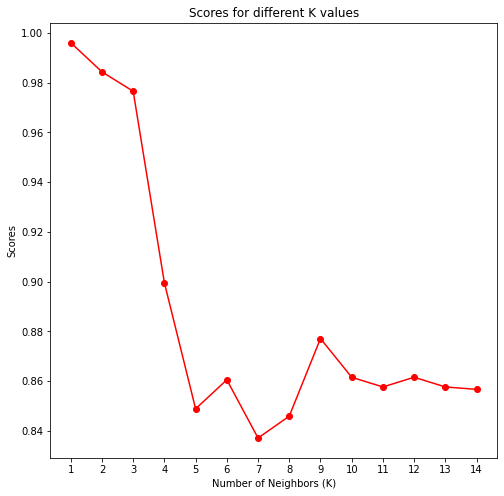

In [ ]:
plt.figure(figsize=(8,8))
plt.plot([k for k in range(1, 15)], knnScores, color = 'red',marker='o')
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('Scores for different K values')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
knn.fit(x_train,y_train)
train_pred=knn.predict(x_train)
score=accuracy_score(y_train,train_pred)

print("Train Accuracy Score : ",score*100)
test_pred=knn.predict(x_test)
test_score=accuracy_score(y_test,test_pred)
print("Test Accuracy Score : ",test_score*100,'\n\n')

knnScore=cross_val_score(knn,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",knnScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,test_pred),'\n\n')
print(classification_report(y_test,test_pred))

Train Accuracy Score :  100.0
Test Accuracy Score :  100.0 


10-Fold CV Score :  99.41176470588235 

Confusion Matrix : 
 [[125   0]
 [  0 132]] 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



### **Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

svmGrid = {'C': [1,2,4],
            'kernel': ['rbf','linear', 'poly', 'sigmoid'],
            'degree': [2,3,4,5,6,7,8,9,10]
           }


svm = SVC(max_iter=-1)
# svm.fit(x_train, y_train)
svcGscv = GridSearchCV(svm,param_grid=svmGrid,cv=5,n_jobs=-1)

svcGscv.fit(x_train,y_train)
svc_tuned_score = svcGscv.score(x_test, y_test)
svc_tuned_score

1.0

In [ ]:
svcGscv.best_params_

{'C': 4, 'degree': 8, 'kernel': 'poly'}

In [ ]:
svm = SVC(C=4, degree=8, kernel='poly',max_iter=1000)
svm.fit(x_train,y_train)

train_pred=svm.predict(x_train)
score=accuracy_score(y_train,train_pred)

print("Train Accuracy Score : ",score*100)
test_pred=svm.predict(x_test)
test_score=accuracy_score(y_test,test_pred)
print("Test Accuracy Score : ",test_score*100,'\n\n')

svmScore=cross_val_score(svm,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",svmScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,test_pred),'\n\n')
print(classification_report(y_test,test_pred))

Train Accuracy Score :  100.0
Test Accuracy Score :  100.0 


10-Fold CV Score :  99.41462021701885 

Confusion Matrix : 
 [[125   0]
 [  0 132]] 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)
train_pred=nb.predict(x_train)
score=accuracy_score(y_train,train_pred)

print("Train Accuracy Score : ",score*100)
test_pred=nb.predict(x_test)
test_score=accuracy_score(y_test,test_pred)
print("Test Accuracy Score : ",test_score*100,'\n\n')

nbScore=cross_val_score(nb,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",nbScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,test_pred),'\n\n')
print(classification_report(y_test,test_pred))

Train Accuracy Score :  84.63541666666666
Test Accuracy Score :  81.71206225680933 


10-Fold CV Score :  83.9967637540453 

Confusion Matrix : 
 [[ 96  29]
 [ 18 114]] 


              precision    recall  f1-score   support

           0       0.84      0.77      0.80       125
           1       0.80      0.86      0.83       132

    accuracy                           0.82       257
   macro avg       0.82      0.82      0.82       257
weighted avg       0.82      0.82      0.82       257



### **Decision Tree**

Text(0.5, 1.0, 'Scores for different Max Depths')

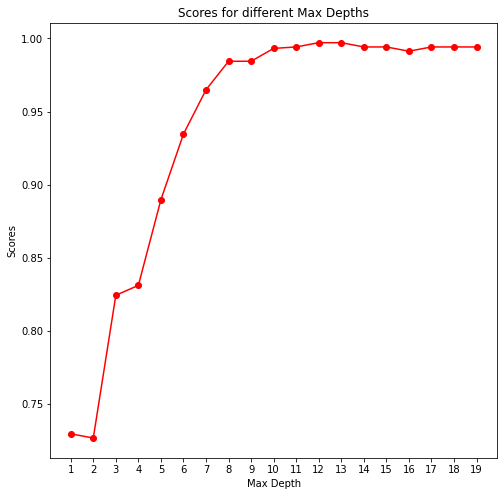

In [ ]:
from sklearn.tree import DecisionTreeClassifier

scores=[]

for i in range(1,20):
    dt=DecisionTreeClassifier(criterion = 'gini',max_depth = i)
    score=cross_val_score(dt,x,y,cv=10)
    scores.append(score.mean())

plt.figure(figsize=(8,8))
plt.plot([k for k in range(1, 20)], scores, color = 'red',marker='o')
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Max Depth')
plt.ylabel('Scores')
plt.title('Scores for different Max Depths')

In [ ]:
dt=DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 12)
dt.fit(x_train,y_train)
train_pred=dt.predict(x_train)
score=accuracy_score(y_train,train_pred)

print("Train Accuracy Score : ",score*100)
test_pred=dt.predict(x_test)
test_score=accuracy_score(y_test,test_pred)
print("Test Accuracy Score : ",test_score*100,'\n\n')

dtScore=cross_val_score(dt,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",dtScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,test_pred),'\n\n')
print(classification_report(y_test,test_pred))

Train Accuracy Score :  100.0
Test Accuracy Score :  100.0 


10-Fold CV Score :  99.70588235294117 

Confusion Matrix : 
 [[125   0]
 [  0 132]] 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [ ]:
# from sklearn import tree

# plt.figure(figsize=(30,25))
# tree.plot_tree(dt,filled=True,fontsize=8)

# # plt.savefig('dt.pdf',dpi=1000)

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randFor = RandomForestClassifier(n_estimators=1000, random_state = 35)
randFor.fit(x_train, y_train)
train_pred=randFor.predict(x_train)
score=accuracy_score(y_train,train_pred)

print("Train Accuracy Score : ",score*100)
test_pred=randFor.predict(x_test)
test_score=accuracy_score(y_test,test_pred)
print("Test Accuracy Score : ",test_score*100,'\n\n')

randForScore=cross_val_score(randFor,x,y,cv=10).mean()*100
print("10-Fold CV Score : ",randForScore,'\n')

print("Confusion Matrix : \n",confusion_matrix(y_test,test_pred),'\n\n')
print(classification_report(y_test,test_pred))

Train Accuracy Score :  100.0
Test Accuracy Score :  100.0 


10-Fold CV Score :  99.70588235294117 

Confusion Matrix : 
 [[125   0]
 [  0 132]] 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [ ]:
from xgboost import XGBClassifier


# **Model Comparison**

In [ ]:
compare = pd.DataFrame({
    'Model':['Logistic Regression','K Nearest Neighbor', 'SVC', 'Naive Bayes', 'Decision Tree', 'Random Forest Classifier'],
    'Accuracy':[lrScore,knnScore,svmScore,nbScore,dtScore,randForScore]
})
compare.sort_values(['Accuracy'],ascending=False)

,Model,Accuracy
4,Decision Tree,99.705882
5,Random Forest Classifier,99.705882
2,SVC,99.414620
1,K Nearest Neighbor,99.411765
0,Logistic Regression,85.944222
3,Naive Bayes,83.996764
